In [1]:
%matplotlib inline
#import definitions
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

#Set up the data files

# 1. Identify the data file locations and names

cwd =os.getcwd()
path1 = (cwd, 'raw_data', 'clinicaltrial_data.csv')
trial_data= '\\'.join(path1)
trial_data

path2 = (cwd, 'raw_data', 'mouse_drug_data.csv')
mouse_data= '\\'.join(path2)
#trial_data = r'''D:\GWU\HW #5\raw_data\clinicaltrial_data.csv'''     # Location of the school CSV file
#mouse_data = r'''D:\GWU\HW #5\raw_data\mouse_drug_data.csv'''   # Location of the student CSV file

In [2]:
# 2.Read in the Data Sets

# Read the CSV into a Pandas DataFrame
trial_df = pd.read_csv(trial_data)
mouse_df = pd.read_csv(mouse_data)

In [3]:
# 3.  View the first five rows using the head method
trial_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [4]:
mouse_df.head()

Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn

In [5]:
# 4.  Get the dimensions of the DataFrames

trial_df.shape

(1893, 4)

In [6]:
mouse_df.shape

(250, 2)

In [7]:
# 5.  List data type of each column, number of missing values, and memory usage using the info method

trial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.2+ KB


In [8]:
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
Mouse ID    250 non-null object
Drug        250 non-null object
dtypes: object(2)
memory usage: 4.0+ KB


In [9]:
# 6. Check for duplicate data
mouse_df['Mouse ID'].value_counts(normalize=True)

g989    0.008
o926    0.004
a818    0.004
v835    0.004
j296    0.004
x402    0.004
x336    0.004
g558    0.004
u153    0.004
s508    0.004
r107    0.004
v764    0.004
s185    0.004
l733    0.004
r157    0.004
k382    0.004
l661    0.004
f993    0.004
a401    0.004
d251    0.004
w151    0.004
j246    0.004
w584    0.004
l490    0.004
o795    0.004
z234    0.004
v295    0.004
a699    0.004
i177    0.004
b759    0.004
        ...  
g107    0.004
c139    0.004
x401    0.004
e227    0.004
s565    0.004
e662    0.004
v289    0.004
r850    0.004
j913    0.004
e476    0.004
g316    0.004
u946    0.004
g296    0.004
r811    0.004
q511    0.004
r944    0.004
m756    0.004
t994    0.004
q787    0.004
f129    0.004
i901    0.004
k210    0.004
m957    0.004
z578    0.004
l700    0.004
c819    0.004
h333    0.004
p136    0.004
f278    0.004
g791    0.004
Name: Mouse ID, Length: 249, dtype: float64

In [10]:
# Notice that the g989 appears more frequently.

In [11]:
# Eliminate duplicate mouse ids

mouse_dedup_df= mouse_df.drop_duplicates(['Mouse ID'])

# Check results
mouse_dedup_df['Mouse ID'].value_counts(normalize=True)

o926    0.004016
k382    0.004016
v835    0.004016
j296    0.004016
x402    0.004016
x336    0.004016
g558    0.004016
u153    0.004016
s508    0.004016
r107    0.004016
v764    0.004016
s185    0.004016
l733    0.004016
r157    0.004016
a818    0.004016
f993    0.004016
w540    0.004016
a401    0.004016
d251    0.004016
w151    0.004016
j246    0.004016
w584    0.004016
l490    0.004016
o795    0.004016
z234    0.004016
v295    0.004016
a699    0.004016
i177    0.004016
b759    0.004016
u364    0.004016
          ...   
g107    0.004016
c139    0.004016
x401    0.004016
e227    0.004016
s565    0.004016
e662    0.004016
v289    0.004016
r850    0.004016
j913    0.004016
e476    0.004016
g316    0.004016
u946    0.004016
g296    0.004016
r811    0.004016
q511    0.004016
r944    0.004016
m756    0.004016
t994    0.004016
q787    0.004016
f129    0.004016
i901    0.004016
k210    0.004016
m957    0.004016
z578    0.004016
l700    0.004016
c819    0.004016
h333    0.004016
p136    0.0040

In [12]:
# Notice that the Length is 249 rather than 250.  All ids are the same frequency. One duplicate eliminated.

In [13]:
mouse_dedup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 249
Data columns (total 2 columns):
Mouse ID    249 non-null object
Drug        249 non-null object
dtypes: object(2)
memory usage: 5.8+ KB


In [14]:
# Notice above there are 249 entries with the index skipping the duplicate id 

In [15]:
#  Eliminate any duplicate entries in the trial data
trial_dedup_df= trial_df.drop_duplicates(['Mouse ID','Timepoint'])

In [16]:
trial_dedup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 4 columns):
Mouse ID              1888 non-null object
Timepoint             1888 non-null int64
Tumor Volume (mm3)    1888 non-null float64
Metastatic Sites      1888 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 73.8+ KB


In [17]:
#Notice there are 1888 entries rather than 1893.  The index is an array with 1888 entries, with the duplicate entries gone
check_trial_index = trial_dedup_df.index
check_trial_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892],
           dtype='int64', length=1888)

In [18]:
#Initialize variables for components of the deduplicated trial dataframe
trial_index = trial_dedup_df.index               # A pandas.core.indexes.range.RangeIndex type.
trial_columns = trial_dedup_df.columns           # A list containing the column names
trial_values = trial_dedup_df.values               # A numpy n-dimensional array
#Initialize variables for components of the desuplicated mouse dataframe
mouse_index = mouse_dedup_df.index             # A pandas.core.indexes.range.RangeIndex type. 
mouse_columns = mouse_dedup_df.columns         # A list containing the column names
mouse_values = mouse_dedup_df.values           # A numpy n-dimensional array

In [19]:
number_of_trials = len(trial_index)         # Inialize the number of trials 
number_of_mice = len(mouse_index)      # Initialize the number of mice
drug_list = ('Stelasyn','Naftisol','Ketapril','Capomulin','Infubinol','Ceftamin','Propriva','Zoniferol','Ramicane','Placebo')
number_of_drugs =len(drug_list)


In [20]:
trial_data_df = trial_dedup_df
mouse_data_df = mouse_dedup_df

In [21]:
volume_df=pd.DataFrame()
for i in range(len(mouse_values)):
    mouse_trial_df = trial_data_df.loc[trial_dedup_df['Mouse ID'] == mouse_values[i,0],:]
    volume_df = volume_df.append(mouse_trial_df)
volume_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
57       f234          0           45.000000                 0
262      f234          5           47.313491                 0
661      f234         10           47.904324                 0
902      f234         15           48.735197                 1
1088     f234         20           51.112713                 2
1187     f234         25           52.178602                 2
1349     f234         30           56.873817                 2
1536     f234         35           57.748758                 2
68       x402          0           45.000000                 0
266      x402          5           46.327570                 1
663      x402         10           46.886962                 1
837      x402         15           49.119948                 1
1084     x402         20           50.414750                 2
1189     x402         25           52.431737                 2
1348     x402         30           54.351585                 3
1533     x402         35           55.240962                 3
1727     x402         40           56.691723                 3
1841     x402         45           61.619606                 3
82       a492          0           45.000000                 0
269      a492          5           46.409143                 0
607      a492         10           48.432197                 0
832      a492         15           51.985263                 0
1082     a492         20           53.677193                 0
1191     a492         25           54.701229                 1
1343     a492         30           56.201041                 1
1527     a492         35           57.308554                 1
1718     a492         40           57.928499                 1
1845     a492         45           60.122011                 1
83       w540          0           45.000000                 0
384      w540          5           45.885370                 1
...       ...        ...                 ...               ...
1261     i669         25           53.303185                 2
145      r850          0           45.000000                 0
409      r850          5           46.862912                 0
696      r850         10           48.515091                 1
723      r850         15           50.218605                 1
144      a262          0           45.000000                 0
471      a262          5           48.717568                 1
688      a262         10           49.595181                 1
718      a262         15           53.827974                 2
945      a262         20           57.013313                 2
1263     a262         25           60.131862                 2
1382     a262         30           64.958092                 3
1612     a262         35           66.561963                 4
1621     a262         40           69.592732                 4
1783     a262         45           70.717621                 4
143      q787          0           45.000000                 0
457      q787          5           47.116616                 0
678      q787         10           48.593862                 1
738      q787         15           49.217732                 2
947      q787         20           50.229934                 2
1291     q787         25           52.713188                 2
1345     q787         30           55.036206                 2
1535     q787         35           60.333852                 3
1654     q787         40           62.034127                 3
1787     q787         45           66.096475                 3
142      j235          0           45.000000                 0
486      j235          5           46.588820                 0
697      j235         10           48.018788                 1
777      j235         15           51.161138                 1
1021     j235         20           52.942902                 1

[1888 rows x 4 columns]

In [22]:
process_df=volume_df.pivot(index='Mouse ID',columns='Timepoint',values='Tumor Volume (mm3)')
process_df.head()

Timepoint    0          5          10         15         20         25  \
Mouse ID                                                                 
a203       45.0  48.508468  51.852437  52.777870  55.173336  56.793208   
a251       45.0  46.982127  48.591179  50.534456  54.462594  57.414646   
a262       45.0  48.717568  49.595181  53.827974  57.013313  60.131862   
a275       45.0  46.795257  47.371343  49.734404  50.513437  53.576064   
a366       45.0  48.951368  53.523990  55.265582  57.285987  59.011728   

Timepoint         30         35         40         45  
Mouse ID                                               
a203       59.523197  61.931650  63.593490  67.973419  
a251       59.861241  60.903885  63.095076  65.525743  
a262       64.958092  66.561963  69.592732  70.717621  
a275       54.444713  56.353538  60.921539  62.999356  
a366       63.440686        NaN        NaN        NaN

In [23]:
#Add a new column to the DataFrame called Drug
process_df['Drug'] ='n/a'
process_df

Timepoint     0          5         10         15         20         25  \
Mouse ID                                                                 
a203       45.0  48.508468  51.852437  52.777870  55.173336  56.793208   
a251       45.0  46.982127  48.591179  50.534456  54.462594  57.414646   
a262       45.0  48.717568  49.595181  53.827974  57.013313  60.131862   
a275       45.0  46.795257  47.371343  49.734404  50.513437  53.576064   
a366       45.0  48.951368  53.523990  55.265582  57.285987  59.011728   
a401       45.0  46.111986  47.725937  49.934725  52.204511  54.209836   
a411       45.0  45.466677  40.759788  41.484169  38.087373  38.701438   
a444       45.0  44.005975  44.512560  43.001280  41.714619  42.291394   
a457       45.0  47.462891  49.783419        NaN        NaN        NaN   
a492       45.0  46.409143  48.432197  51.985263  53.677193  54.701229   
a520       45.0  38.723707  36.429388  35.590254  35.947745  36.558581   
a577       45.0  46.197720  49.509639  50.915007  52.365185  54.380932   
a644       45.0  45.550158  46.380713  46.910892  45.865065  41.481224   
a685       45.0  46.870483  47.664753  48.951474  49.490559  51.939951   
a699       45.0  46.553090  47.867376  49.530401  50.712423  51.846381   
a788       45.0  47.006580  50.159721  52.539949  54.060983  56.770280   
a818       45.0  45.696709  49.790919  51.227566  54.834624  56.966273   
a897       45.0  45.691124  47.972927  52.343085  54.595705  56.413320   
a963       45.0  46.233506  47.150522  47.836852  51.463734  52.129804   
b128       45.0  45.651331  43.270852  43.784893  42.731552  43.262145   
b313       45.0  47.154433  48.319372  49.188387  53.979680  55.745146   
b447       45.0        NaN        NaN        NaN        NaN        NaN   
b487       45.0  46.213977  47.664387  51.683256  53.427663  56.057749   
b559       45.0  47.409897  48.036432  51.378862  55.654456  57.043669   
b742       45.0  41.534097  41.999228  39.524843  37.950355  38.617684   
b759       45.0  48.009190  49.133355  51.587799  54.443035  55.083632   
b879       45.0  49.156156  50.338946  51.618387  53.983436  56.469987   
c139       45.0  48.753112  49.992954  51.833225  56.742007  61.461970   
c264       45.0  45.791704  49.026592  53.664942  54.568196  56.966769   
c282       45.0  45.725690  48.179506  49.266079  51.950574  56.292200   
...         ...        ...        ...        ...        ...        ...   
w697       45.0  48.301823  48.925056  52.657265  54.228091  57.610394   
w746       45.0  49.453270        NaN        NaN        NaN        NaN   
w914       45.0  45.893720  43.231963  43.688449  41.108092  40.291917   
x111       45.0  46.941015  49.122969        NaN        NaN        NaN   
x209       45.0  46.754269  48.929895        NaN        NaN        NaN   
x226       45.0        NaN        NaN        NaN        NaN        NaN   
x264       45.0  47.038415  47.887128  50.002314  53.074270  56.891053   
x336       45.0        NaN        NaN        NaN        NaN        NaN   
x401       45.0  45.473753  39.113891  39.776250  36.065835  36.617120   
x402       45.0  46.327570  46.886962  49.119948  50.414750  52.431737   
x581       45.0  47.196927  49.067028  49.746427  51.207969  51.935283   
x613       45.0  46.097041  46.818176  48.077646        NaN        NaN   
x773       45.0  45.850831  47.189206  47.671236  49.739713  51.104421   
x822       45.0  45.671104  48.983717  49.694665  51.914910  54.041333   
x930       45.0  46.078234  50.260694  51.973769  52.556066  53.726101   
y163       45.0  48.284970  49.112399  51.523068  54.571076  56.176385   
y260       45.0  46.799839  48.081807  50.196152  50.729582  54.437562   
y449       45.0  45.877545  46.378092  44.183451        NaN        NaN   
y478       45.0  48.641078  52.288934  53.610406  56.848850  57.826976   
y601       45.0  48.475003        NaN        NaN        NaN        NaN   
y769       45.0  46.422652  48.015163  52.761021  55.025724  58.335959   
y793

In [24]:
#Now find the Drug that was used to treat each mouse

# Start by looking at the mouse DataFrame and locate what drug the mouse was treated with and then 
# add then value to our working DataFrame.
#
x = mouse_data_df.set_index('Mouse ID')

for i in x.index:
    process_df.loc[i,'Drug']= x.loc[i,'Drug']

In [25]:
process_df.head()

Timepoint     0          5         10         15         20         25  \
Mouse ID                                                                 
a203       45.0  48.508468  51.852437  52.777870  55.173336  56.793208   
a251       45.0  46.982127  48.591179  50.534456  54.462594  57.414646   
a262       45.0  48.717568  49.595181  53.827974  57.013313  60.131862   
a275       45.0  46.795257  47.371343  49.734404  50.513437  53.576064   
a366       45.0  48.951368  53.523990  55.265582  57.285987  59.011728   

Timepoint         30         35         40         45       Drug  
Mouse ID                                                          
a203       59.523197  61.931650  63.593490  67.973419  Infubinol  
a251       59.861241  60.903885  63.095076  65.525743  Infubinol  
a262       64.958092  66.561963  69.592732  70.717621    Placebo  
a275       54.444713  56.353538  60.921539  62.999356   Ceftamin  
a366       63.440686        NaN        NaN        NaN   Stelasyn

In [26]:
# Sort by Drug
sorted_results=process_df.sort_values(['Drug'])
sorted_results.head(25)

Timepoint     0          5         10         15         20         25  \
Mouse ID                                                                 
g316       45.0  44.022752  44.502042  45.216743  45.933322  46.809225   
s710       45.0  43.180977  43.688026  41.845235  42.629963  43.060409   
t565       45.0  45.895647  46.749006  44.440949  39.070214  37.342210   
r944       45.0  45.737145  46.544292  47.373423  43.225671  41.086991   
r554       45.0  45.781746  39.005493  35.463758  36.015589  33.893345   
r157       45.0  45.597064  46.059608  46.539206        NaN        NaN   
b742       45.0  41.534097  41.999228  39.524843  37.950355  38.617684   
u364       45.0  45.760886  46.568417  47.212200  40.343948  35.503616   
j246       45.0  45.641438  46.408361  43.312654  44.020370  44.555226   
j119       45.0  45.838998  46.425366  47.322984  48.158209  42.417166   
b128       45.0  45.651331  43.270852  43.784893  42.731552  43.262145   
i738       45.0  45.595685  43.421014  37.978778  38.531136  34.973438   
s185       45.0  43.878496  37.614948  38.177232  36.866876  33.949940   
w150       45.0  39.202129  39.952347        NaN        NaN        NaN   
v923       45.0  45.704434  39.848223  40.457989  39.648296  40.156413   
i557       45.0  42.261665  42.992077  43.529876  43.967895  44.596219   
l509       45.0  45.851193  46.759074  47.488599  48.070452  44.006257   
y793       45.0  41.019913  41.630010  42.283665  40.716428  38.992734   
l897       45.0  45.462243  46.154737  44.061521  44.813093  45.354679   
m957       45.0  45.622381  46.414518  39.804453  38.909349  37.695432   
m601       45.0  41.408591  36.825367  35.464612  34.255732  33.118756   
w914       45.0  45.893720  43.231963  43.688449  41.108092  40.291917   
f966       45.0  38.796474  35.624403  32.623003  30.485985        NaN   
x401       45.0  45.473753  39.113891  39.776250  36.065835  36.617120   
g288       45.0  45.839400  46.304003  42.172301  42.957120  42.368692   

Timepoint         30         35         40         45       Drug  
Mouse ID                                                          
g316       44.221480  44.702833  45.565821  40.159220  Capomulin  
s710       43.571703  44.160519  40.171920  40.728578  Capomulin  
t565       32.868916  33.515671  33.949341  34.455298  Capomulin  
r944       41.680791  40.401765  41.042045  41.581521  Capomulin  
r554       32.680655  33.069337  31.804841  32.377357  Capomulin  
r157             NaN        NaN        NaN        NaN  Capomulin  
b742       39.167949  39.847576  38.255627  38.939633  Capomulin  
u364       35.978334  35.459490  36.024138  31.023923  Capomulin  
j246       38.044082  38.753265        NaN        NaN  Capomulin  
j119       43.013681  43.765705  44.585090  38.125164  Capomulin  
b128       40.605335  37.967644  38.379726  38.982878  Capomulin  
i738       35.578780  36.175953  36.843898  37.311846  Capomulin  
s185       32.959671  28.328531  25.472143  23.343598  Capomulin  
w150             NaN        NaN        NaN        NaN  Capomulin  
v923       40.752216  41.439242  42.151015  40.658124  Capomulin  
i557       45.261384  45.941949  46.821070  47.685963  Capomulin  
l509       44.708055  40.207289  40.770813  41.483008  Capomulin  
y793       35.726023  36.327870  31.475411  31.896238  Capomulin  
l897       39.352792  37.682767  38.343902  38.846876  Capomulin  
m957       38.212479  32.562839  32.947615  33.329098  Capomulin  
m601       31.758275  30.834357  31.378045  28.430964  Capomulin  
w914       40.993110  41.664916  35.611309  36.041047  Capomulin  
f966             NaN        NaN        NaN        NaN  Capomulin  
x401       32.915292  30.206825  28.167397  28.484033  Capomulin  
g288       42.874461  38.954115  36.356851  37.074024  Capomulin

In [27]:
summary_volume_dict ={}
summary_volume_dict['Timepoint'] = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
for i in drug_list:
    x_drug_df = drug_prep_df=sorted_results.loc[sorted_results['Drug'] == str(i),:]
    x_drug_results_df = x_drug_df.drop('Drug',1)
    drug_median_series = x_drug_results_df.median()
    drug_median_values_lst = drug_median_series.values.tolist()
    summary_volume_dict[i] = drug_median_values_lst 

In [28]:
summary_volume_df= pd.DataFrame.from_dict(summary_volume_dict)
summary_volume_df.tail()

Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
5  40.224165  54.275954  55.924633  56.957917  56.928663  57.106418   
6  39.260371  56.362744  59.133640  60.296505  59.789636  59.916934   
7  38.360455  58.208362  60.722723  62.539154  61.893153  62.970450   
8  36.843898  60.600972  63.344283  66.229606  65.466074  66.287744   
9  37.311846  64.299830  66.083066  69.872251  69.563621  69.042841   

    Propriva   Ramicane   Stelasyn  Timepoint  Zoniferol  
5  55.754083  38.097513  56.469987         25  55.676604  
6  58.679651  38.242066  60.598649         30  57.419744  
7  60.862159  37.624710  63.723016         35  60.365832  
8  62.324348  35.668692  67.396174         40  62.274543  
9  64.957562  34.848627  69.299149         45  65.684689

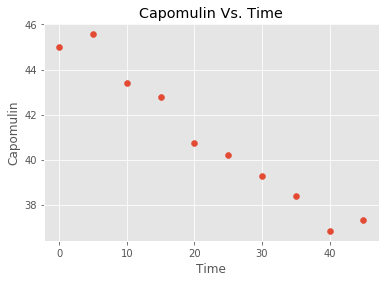

In [29]:
#One way to generate a scatterplot
plt.style.use('ggplot')
x_limit = 50
x_axis = np.arange(0,x_limit,5)
fig, ax = plt.subplots()
ax.set_xlabel('Time')
ax.set_ylabel('Capomulin')
ax.grid(True)
ax.set_title("Capomulin Vs. Time")
Capomulin_scatter_plot = ax.scatter(x_axis,summary_volume_df['Capomulin'])

plt.show()

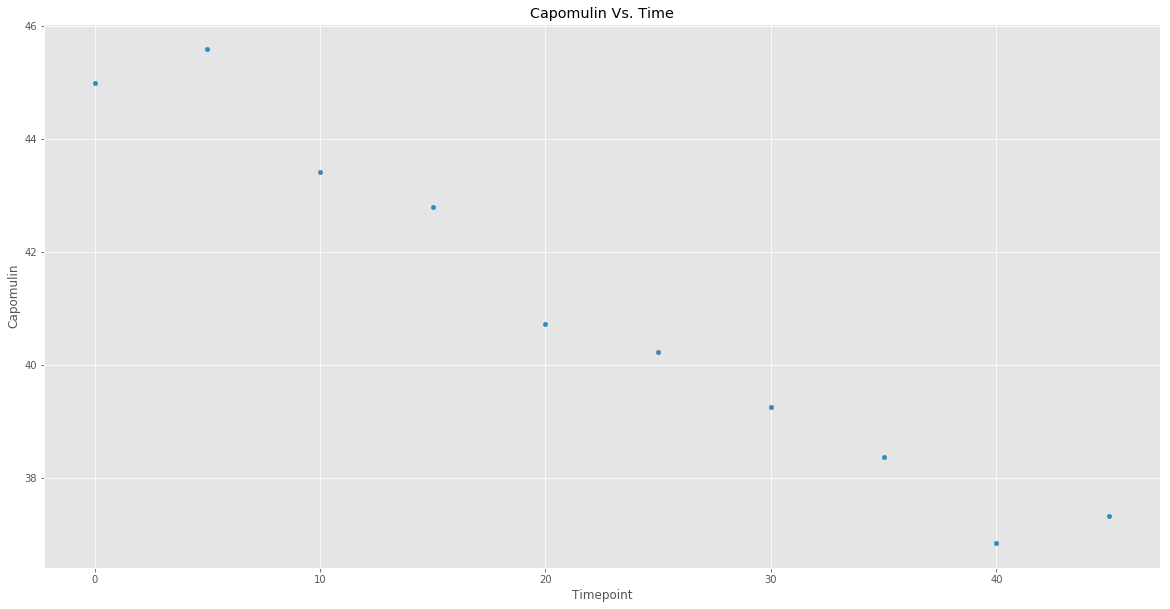

In [30]:
#Another way to generate a scatterplot
summary_volume_df.plot(kind="scatter", x= 'Timepoint', y="Capomulin", grid=True, figsize=(20,10),
              title="Capomulin Vs. Time")

plt.show()

In [31]:
#Seaborn makes better looking plots than matplotlib
#I will use Seaborn for the rest of the visualizations

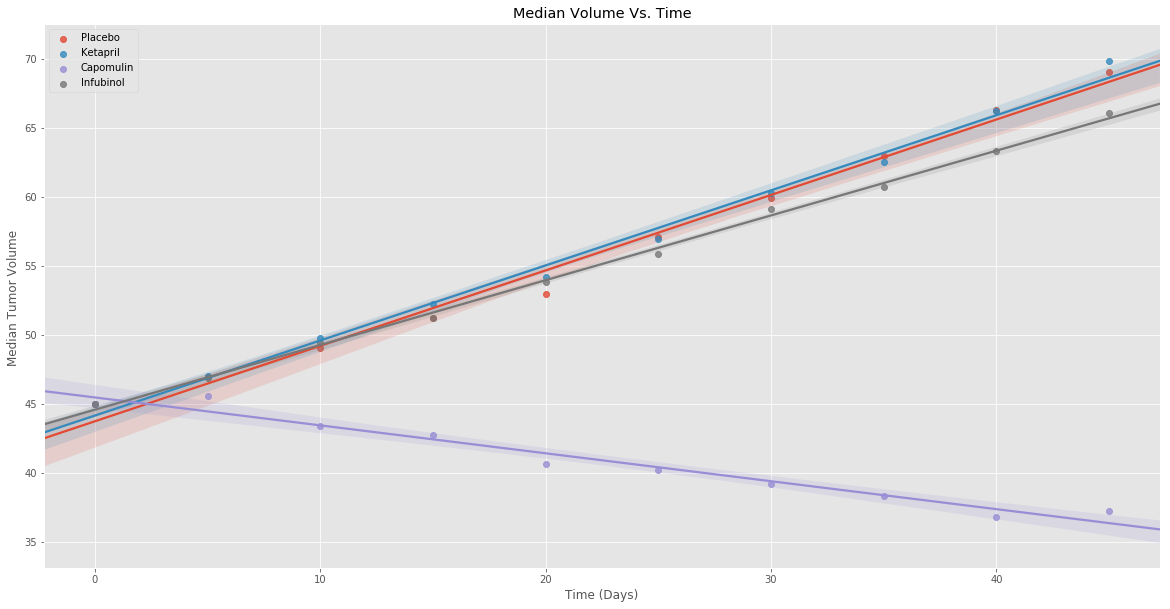

In [32]:
# library & dataset
import seaborn as sns
df = summary_volume_df

fig, ax = plt.subplots(figsize=(20,10))

# use the function regplot to make a scatterplot
sns.regplot(x=df["Timepoint"], y=df["Placebo"], label= "Placebo")
sns.regplot(x=df["Timepoint"], y=df["Ketapril"],label= "Ketapril")
sns.regplot(x=df["Timepoint"], y=df["Capomulin"],label= "Capomulin")
sns.regplot(x=df["Timepoint"], y=df["Infubinol"], label= "Infubinol")
ax.set_title("Median Volume Vs. Time")
ax.set_xlabel('Time (Days)')
ax.set_ylabel("Median Tumor Volume ")
ax.legend()
# Without regression fit:
#sns.regplot(x=df["Timepoint"], y=df["Placebo"], fit_reg=False)
plt.savefig('Tumor Volume.png')

In [33]:
########################################### End of Step 1 #####################################################################

In [34]:
########################################### Start of Step 2 #####################################################################

In [35]:
# Look at the number of metastic sites.

sites_df = trial_data_df[['Mouse ID','Timepoint','Metastatic Sites']]
sites_df.head()
#Build a trial DataFrame, sorted by Mouse ID, not Timepoint 

Mouse ID  Timepoint  Metastatic Sites
0     b128          0                 0
1     f932          0                 0
2     g107          0                 0
3     a457          0                 0
4     c819          0                 0

In [36]:
#Build a trial DataFrame, sorted by Mouse ID, for successive values of Timepoint 
sorted_sites_df = sites_df.sort_values(['Mouse ID', 'Timepoint'])
sorted_sites_df.head(25)

Mouse ID  Timepoint  Metastatic Sites
113      a203          0                 0
389      a203          5                 0
598      a203         10                 1
758      a203         15                 1
1018     a203         20                 1
1295     a203         25                 1
1315     a203         30                 1
1577     a203         35                 2
1675     a203         40                 2
1804     a203         45                 2
38       a251          0                 0
456      a251          5                 0
518      a251         10                 1
729      a251         15                 1
943      a251         20                 1
1284     a251         25                 1
1350     a251         30                 1
1516     a251         35                 1
1731     a251         40                 1
1786     a251         45                 1
144      a262          0                 0
471      a262          5                 1
688      a262         10                 1
718      a262         15                 2
945      a262         20                 2

In [37]:
#Now pivot the DataFrame so we see the effects of the treatment over the time interval
process_df=sorted_sites_df.pivot(index='Mouse ID',columns='Timepoint',values='Metastatic Sites')
process_df.head()

Timepoint   0    5    10   15   20   25   30   35   40   45
Mouse ID                                                   
a203       0.0  0.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0
a251       0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
a262       0.0  1.0  1.0  2.0  2.0  2.0  3.0  4.0  4.0  4.0
a275       0.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  3.0  3.0
a366       0.0  0.0  0.0  0.0  0.0  0.0  1.0  NaN  NaN  NaN

In [38]:
#Add a new column to the DataFrame called Drug
process_df['Drug'] ='n/a'
process_df.head()

Timepoint    0    5   10   15   20   25   30   35   40   45 Drug
Mouse ID                                                        
a203       0.0  0.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  n/a
a251       0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  n/a
a262       0.0  1.0  1.0  2.0  2.0  2.0  3.0  4.0  4.0  4.0  n/a
a275       0.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  3.0  3.0  n/a
a366       0.0  0.0  0.0  0.0  0.0  0.0  1.0  NaN  NaN  NaN  n/a

In [39]:
#Now find the Drug that was used to treat each mouse

# Start by looking at the mouse DataFrame and locate what drug the mouse was treated with and then 
# add then value to our working DataFrame.
#
x = mouse_data_df.set_index('Mouse ID')

for i in x.index:
    process_df.loc[i,'Drug']= x.loc[i,'Drug']
process_df.head()

Timepoint    0    5   10   15   20   25   30   35   40   45       Drug
Mouse ID                                                              
a203       0.0  0.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  Infubinol
a251       0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  Infubinol
a262       0.0  1.0  1.0  2.0  2.0  2.0  3.0  4.0  4.0  4.0    Placebo
a275       0.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  3.0  3.0   Ceftamin
a366       0.0  0.0  0.0  0.0  0.0  0.0  1.0  NaN  NaN  NaN   Stelasyn

In [40]:
# Sort by Drug
sorted_results_df=process_df.sort_values(['Drug'])
sorted_results_df.head()

Timepoint    0    5   10   15   20   25   30   35   40   45       Drug
Mouse ID                                                              
g316       0.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  2.0  2.0  Capomulin
s710       0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  Capomulin
t565       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  Capomulin
r944       0.0  0.0  0.0  0.0  1.0  1.0  1.0  2.0  2.0  2.0  Capomulin
r554       0.0  1.0  2.0  2.0  2.0  3.0  3.0  3.0  3.0  3.0  Capomulin

In [41]:
#Build the parts of the DataFrame to contain the median values for each Drug
#It will be built with a list of dictionaries.
#The first dictionary in the list of dictionaries will be the column containing Timepoint values for our median values DataFrame
#The subsequent dictionaries in the list will contain the site values for each Timepoint in successive order

summary_sites_dict ={}
summary_sites_dict['Timepoint'] = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]     #Column headings
for i in drug_list:
    drug_prep_df = sorted_results_df.loc[sorted_results['Drug'] == str(i),:]  #Create a data frame for each drug
    x_drug_df = drug_prep_df                                                  
    x_drug_results_df = x_drug_df.drop('Drug',1)                    #Drop the Drug column. Major axis = 1. The column axis
    drug_median_series = x_drug_results_df.median()                 #Compute the median of each Timepoint column for all the mice
    drug_median_values_lst = drug_median_series.values.tolist()     #The values for the median are a series. Make it a list.
    summary_sites_dict[i] = drug_median_values_lst                 #The next dictionary in our list contains the median values

In [42]:
summary_sites_dict

{'Capomulin': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'Ceftamin': [0.0, 0.0, 0.5, 1.0, 1.0, 1.5, 2.0, 2.0, 2.5, 3.0],
 'Infubinol': [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 2.0, 2.0],
 'Ketapril': [0.0, 0.0, 0.5, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 4.0],
 'Naftisol': [0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0],
 'Placebo': [0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.5, 4.0],
 'Propriva': [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.5, 2.0, 3.0, 2.0],
 'Ramicane': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'Stelasyn': [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.0, 1.0],
 'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45],
 'Zoniferol': [0.0, 0.0, 0.5, 1.0, 1.0, 1.5, 2.0, 2.0, 3.0, 3.5]}

In [43]:
summary_sites_df= pd.DataFrame.from_dict(summary_sites_dict)
summary_sites_df

Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  Propriva  \
0        0.0       0.0        0.0       0.0       0.0      0.0       0.0   
1        0.0       0.0        0.0       0.0       0.0      0.0       0.0   
2        0.0       0.5        1.0       0.5       0.0      1.0       1.0   
3        0.0       1.0        1.0       1.0       1.0      1.0       1.0   
4        0.0       1.0        1.0       1.0       1.0      1.0       1.0   
5        1.0       1.5        1.0       2.0       2.0      2.0       1.0   
6        1.0       2.0        1.0       2.0       2.0      2.0       1.5   
7        1.0       2.0        1.5       2.0       2.0      3.0       2.0   
8        1.0       2.5        2.0       3.0       3.0      3.5       3.0   
9        1.0       3.0        2.0       4.0       3.0      4.0       2.0   

   Ramicane  Stelasyn  Timepoint  Zoniferol  
0       0.0       0.0          0        0.0  
1       0.0       0.0          5        0.0  
2       0.0       0.0         10        0.5  
3       0.0       1.0         15        1.0  
4       0.0       1.0         20        1.0  
5       1.0       1.0         25        1.5  
6       1.0       1.0         30        2.0  
7       1.0       1.5         35        2.0  
8       1.0       1.0         40        3.0  
9       1.0       1.0         45        3.5

In [44]:
#summary_sites_df.set_index('Timepoint')
#summary_sites_df= summary_sites_df.set_index('Timepoint')

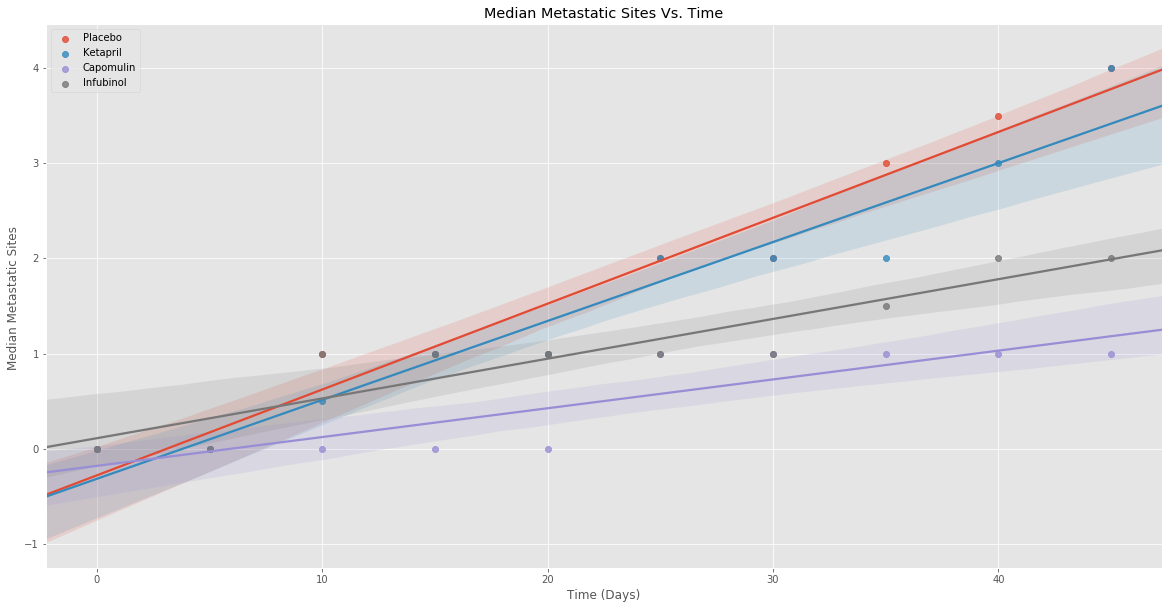

In [45]:
# library & dataset
import seaborn as sns
df = summary_sites_df

fig, ax = plt.subplots(figsize=(20,10))


# use the function regplot to make a scatterplot
sns.regplot(x=df["Timepoint"], y=df["Placebo"], label= "Placebo")
sns.regplot(x=df["Timepoint"], y=df["Ketapril"],label= "Ketapril")
sns.regplot(x=df["Timepoint"], y=df["Capomulin"],label= "Capomulin")
sns.regplot(x=df["Timepoint"], y=df["Infubinol"], label= "Infubinol")
ax.legend()
ax.set_title("Median Metastatic Sites Vs. Time")
ax.set_xlabel('Time (Days)')
ax.set_ylabel("Median Metastatic Sites ")
# Without regression fit:
#sns.regplot(x=df["Timepoint"], y=df["Placebo"], fit_reg=False)
plt.savefig('Metastatic_Sites Volume.png')

In [46]:
########################################### End of Step 2 #####################################################################

In [47]:
###############################  Start of Step 3 Survival Rate ########################################################

In [48]:
process_df

Timepoint    0    5   10   15   20   25   30   35   40   45       Drug
Mouse ID                                                              
a203       0.0  0.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  Infubinol
a251       0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  Infubinol
a262       0.0  1.0  1.0  2.0  2.0  2.0  3.0  4.0  4.0  4.0    Placebo
a275       0.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  3.0  3.0   Ceftamin
a366       0.0  0.0  0.0  0.0  0.0  0.0  1.0  NaN  NaN  NaN   Stelasyn
a401       0.0  0.0  1.0  1.0  2.0  3.0  3.0  3.0  4.0  4.0  Zoniferol
a411       0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   Ramicane
a444       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   Ramicane
a457       0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   Ketapril
a492       0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   Stelasyn
a520       0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   Ramicane
a577       0.0  1.0  1.0  2.0  2.0  2.0  2.0  NaN  NaN  NaN  Infubinol
a644       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   Ramicane
a685       0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  2.0  3.0  Infubinol
a699       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   Propriva
a788       0.0  0.0  1.0  1.0  1.0  1.0  1.0  NaN  NaN  NaN  Zoniferol
a818       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  2.0   Naftisol
a897       0.0  1.0  1.0  2.0  3.0  3.0  3.0  3.0  4.0  4.0    Placebo
a963       0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0   Stelasyn
b128       0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  2.0  2.0  Capomulin
b313       0.0  0.0  1.0  1.0  1.0  1.0  NaN  NaN  NaN  NaN  Zoniferol
b447       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   Ceftamin
b487       0.0  0.0  0.0  0.0  0.0  1.0  NaN  NaN  NaN  NaN   Ceftamin
b559       0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0   Naftisol
b742       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  Capomulin
b759       0.0  0.0  0.0  0.0  0.0  0.0  1.0  NaN  NaN  NaN   Ceftamin
b879       0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0   Stelasyn
c139       0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  Infubinol
c264       0.0  0.0  0.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  Zoniferol
c282       0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  2.0  2.0    Placebo
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...        ...
w697       0.0  1.0  2.0  2.0  3.0  3.0  3.0  3.0  NaN  NaN   Stelasyn
w746       0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   Propriva
w914       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  2.0  2.0  Capomulin
x111       0.0  1.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   Propriva
x209       0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   Propriva
x226       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   Ceftamin
x264       0.0  0.0  1.0  1.0  1.0  2.0  3.0  4.0  4.0  NaN   Naftisol
x336       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   Naftisol
x401       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  Capomulin
x402       0.0  1.0  1.0  1.0  2.0  2.0  3.0  3.0  3.0  3.0   Stelasyn
x581       0.0  0.0  1.0  2.0  3.0  3.0  3.0  3.0  3.0  3.0   Ceftamin
x613       0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  Zoniferol
x773       0.0  1.0  2.0  3.0  3.0  3.0  4.0  4.0  4.0  4.0    Placebo
x822       0.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  3.0   Ceftamin
x930       0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN   Naftisol
y163       0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  3.0  Infubinol
y260       0.0  0.0  1.0  2.0  3.0  4.0  4.0  4.0  4.0  4.0   Ketapril
y449       0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN   Ramicane
y478       0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0    Placebo
y601       0.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   Naftisol
y769       0.0  1.0  1.0  2.0  2.0  3.0  3.0  3.0  4.0  4.0   Ceftamin
y793       0.0  0.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  Capomulin
y865       0.0  1.0  1.0  1.0  1.0  2.0  3.0  3.0  3.0  3.0   Ceftamin
z234       0.0  1.0  NaN

In [49]:
x_df=process_df.loc[process_df['Drug'] == 'Zoniferol',:]

In [50]:
x_df

Timepoint    0    5   10   15   20   25   30   35   40   45       Drug
Mouse ID                                                              
a401       0.0  0.0  1.0  1.0  2.0  3.0  3.0  3.0  4.0  4.0  Zoniferol
a788       0.0  0.0  1.0  1.0  1.0  1.0  1.0  NaN  NaN  NaN  Zoniferol
b313       0.0  0.0  1.0  1.0  1.0  1.0  NaN  NaN  NaN  NaN  Zoniferol
c264       0.0  0.0  0.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  Zoniferol
c302       0.0  1.0  1.0  2.0  3.0  3.0  3.0  3.0  4.0  4.0  Zoniferol
c559       0.0  0.0  0.0  1.0  2.0  2.0  2.0  2.0  3.0  4.0  Zoniferol
d133       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Zoniferol
d164       0.0  0.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Zoniferol
f129       0.0  0.0  1.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  Zoniferol
f394       0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Zoniferol
f545       0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  Zoniferol
g296       0.0  0.0  0.0  1.0  2.0  3.0  3.0  4.0  4.0  4.0  Zoniferol
j365       0.0  0.0  0.0  0.0  1.0  1.0  1.0  2.0  2.0  2.0  Zoniferol
k754       0.0  0.0  0.0  0.0  1.0  NaN  NaN  NaN  NaN  NaN  Zoniferol
k894       0.0  0.0  1.0  1.0  1.0  2.0  3.0  4.0  4.0  4.0  Zoniferol
m331       0.0  1.0  1.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  Zoniferol
n967       0.0  1.0  1.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  Zoniferol
o926       0.0  0.0  1.0  1.0  2.0  3.0  3.0  3.0  3.0  4.0  Zoniferol
p136       0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  Zoniferol
q511       0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  2.0  3.0  Zoniferol
q633       0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  Zoniferol
s337       0.0  0.0  0.0  0.0  1.0  2.0  3.0  3.0  4.0  4.0  Zoniferol
w140       0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Zoniferol
w575       0.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  3.0  3.0  Zoniferol
x613       0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  Zoniferol

In [51]:
y_df=x_df.describe()
y_df

Timepoint    0          5          10         15         20         25  \
count      25.0  24.000000  22.000000  21.000000  17.000000  16.000000   
mean        0.0   0.166667   0.500000   0.809524   1.294118   1.687500   
std         0.0   0.380693   0.511766   0.511766   0.685994   0.946485   
min         0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
25%         0.0   0.000000   0.000000   1.000000   1.000000   1.000000   
50%         0.0   0.000000   0.500000   1.000000   1.000000   1.500000   
75%         0.0   0.000000   1.000000   1.000000   2.000000   2.250000   
max         0.0   1.000000   1.000000   2.000000   3.000000   3.000000   

Timepoint         30         35         40         45  
count      15.000000  14.000000  14.000000  14.000000  
mean        1.933333   2.285714   2.785714   3.071429  
std         0.961150   1.069045   1.121714   1.071612  
min         1.000000   1.000000   1.000000   1.000000  
25%         1.000000   1.250000   2.000000   2.000000  
50%         2.000000   2.000000   3.000000   3.500000  
75%         3.000000   3.000000   4.000000   4.000000  
max         3.000000   4.000000   4.000000   4.000000

In [52]:
type(y_df)

pandas.core.frame.DataFrame

In [53]:
z_series=y_df.iloc[0,:]
z_series

Timepoint
0     25.0
5     24.0
10    22.0
15    21.0
20    17.0
25    16.0
30    15.0
35    14.0
40    14.0
45    14.0
Name: count, dtype: float64

In [54]:
type(z_series)

pandas.core.series.Series

In [55]:
summary_survival_dict ={}
summary_survival_dict['Timepoint'] = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]     #Column headings
for i in drug_list:
    drug_prep_df = sorted_results_df.loc[sorted_results['Drug'] == str(i),:]  #Create a data frame for each drug
    x_drug_df = drug_prep_df                                                  
    x_drug_results_df = x_drug_df.drop('Drug',1)                    #Drop the Drug column. Major axis = 1. The column axis
    drug_survival_series = x_drug_results_df.count()                 #Compute the median of each Timepoint column for all the mice
    drug_survival_values_lst = drug_survival_series.values.tolist()     #The values for the median are a series. Make it a list.
    summary_survival_dict[i] = drug_survival_values_lst 

In [56]:
summary_survival_dict

{'Capomulin': [25, 25, 25, 24, 23, 22, 22, 22, 21, 21],
 'Ceftamin': [25, 21, 20, 19, 18, 18, 16, 14, 14, 13],
 'Infubinol': [25, 25, 21, 21, 20, 18, 17, 12, 10, 9],
 'Ketapril': [25, 23, 22, 19, 19, 19, 18, 17, 15, 11],
 'Naftisol': [25, 23, 21, 21, 20, 18, 15, 15, 15, 13],
 'Placebo': [25, 24, 24, 20, 19, 17, 15, 14, 12, 11],
 'Propriva': [24, 23, 21, 15, 15, 13, 12, 9, 9, 7],
 'Ramicane': [25, 25, 24, 24, 23, 23, 23, 21, 20, 20],
 'Stelasyn': [25, 24, 22, 22, 20, 19, 18, 16, 12, 11],
 'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45],
 'Zoniferol': [25, 24, 22, 21, 17, 16, 15, 14, 14, 14]}

In [57]:
summary_survival_df= pd.DataFrame.from_dict(summary_survival_dict)
summary_survival_df=summary_survival_df.set_index('Timepoint')
summary_survival_df

Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   
25                22        18         18        19        18       17   
30                22        16         17        18        15       15   
35                22        14         12        17        15       14   
40                21        14         10        15        15       12   
45                21        13          9        11        13       11   

           Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                24        25        25         25  
5                23        25        24         24  
10               21        24        22         22  
15               15        24        22         21  
20               15        23        20         17  
25               13        23        19         16  
30               12        23        18         15  
35                9        21        16         14  
40                9        20        12         14  
45                7        20        11         14

In [58]:
#survival_rate_series = summary_survival_df.apply(np.mean)
#survival_rate_series
plotting_df = summary_survival_df

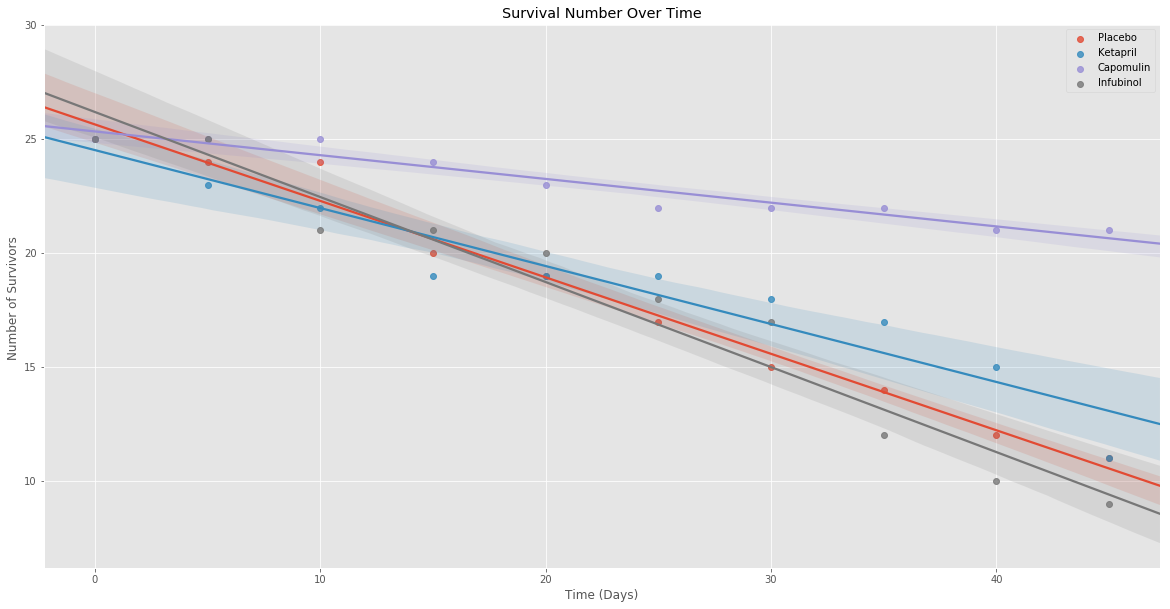

In [59]:
# library & dataset
import seaborn as sns
df = plotting_df

fig, ax = plt.subplots(figsize=(20,10))
x_limit = 50
x_axis = np.arange(0,x_limit,5)

plot_index = plotting_df.index
# use the function regplot to make a scatterplot
sns.regplot(x=x_axis, y=df["Placebo"], label= "Placebo")
sns.regplot(x=x_axis, y=df["Ketapril"],label= "Ketapril")
sns.regplot(x=x_axis, y=df["Capomulin"],label= "Capomulin")
sns.regplot(x=x_axis, y=df["Infubinol"], label= "Infubinol")
ax.legend()
ax.set_title("Survival Number Over Time")
ax.set_xlabel('Time (Days)')
ax.set_ylabel("Number of Survivors ")
# Without regression fit:
#sns.regplot(x=df["Timepoint"], y=df["Placebo"], fit_reg=False)
plt.savefig('Survival_number.png')

In [60]:
########################################### End of Step 3 #####################################################################

In [61]:
########################################### Start of Step 4 % Total Volume Change         ######################################

In [62]:
summary_volume_df

Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
0  45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
1  45.597064  46.370798  46.877243  47.059664  46.621301  46.989764   
2  43.421014  48.164520  49.471244  49.797416  48.185373  49.109721   
3  42.798160  49.746427  51.265440  52.246310  50.666054  51.271314   
4  40.716428  52.112973  53.862724  54.250054  52.855576  53.006865   
5  40.224165  54.275954  55.924633  56.957917  56.928663  57.106418   
6  39.260371  56.362744  59.133640  60.296505  59.789636  59.916934   
7  38.360455  58.208362  60.722723  62.539154  61.893153  62.970450   
8  36.843898  60.600972  63.344283  66.229606  65.466074  66.287744   
9  37.311846  64.299830  66.083066  69.872251  69.563621  69.042841   

    Propriva   Ramicane   Stelasyn  Timepoint  Zoniferol  
0  45.000000  45.000000  45.000000          0  45.000000  
1  46.941015  45.521875  47.183838          5  46.736212  
2  48.899552  42.832023  48.941488         10  48.334346  
3  50.854632  41.262007  51.246304         15  50.583557  
4  53.616863  40.772803  54.105763         20  52.693423  
5  55.754083  38.097513  56.469987         25  55.676604  
6  58.679651  38.242066  60.598649         30  57.419744  
7  60.862159  37.624710  63.723016         35  60.365832  
8  62.324348  35.668692  67.396174         40  62.274543  
9  64.957562  34.848627  69.299149         45  65.684689

In [63]:
analysis_df = summary_volume_df[['Capomulin','Infubinol','Ketapril','Placebo','Timepoint']]
analysis_df

Capomulin  Infubinol   Ketapril    Placebo  Timepoint
0  45.000000  45.000000  45.000000  45.000000          0
1  45.597064  46.877243  47.059664  46.989764          5
2  43.421014  49.471244  49.797416  49.109721         10
3  42.798160  51.265440  52.246310  51.271314         15
4  40.716428  53.862724  54.250054  53.006865         20
5  40.224165  55.924633  56.957917  57.106418         25
6  39.260371  59.133640  60.296505  59.916934         30
7  38.360455  60.722723  62.539154  62.970450         35
8  36.843898  63.344283  66.229606  66.287744         40
9  37.311846  66.083066  69.872251  69.042841         45

In [64]:


#summary_volume_df = summary_volume_df.set_index('Timepoint')

#summary_volume_series = summary_volume_df['Capomulin']
#summary_volume_series

analysis_volume_df = analysis_df.set_index('Timepoint')
analysis_volume_df

Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                            
0          45.000000  45.000000  45.000000  45.000000
5          45.597064  46.877243  47.059664  46.989764
10         43.421014  49.471244  49.797416  49.109721
15         42.798160  51.265440  52.246310  51.271314
20         40.716428  53.862724  54.250054  53.006865
25         40.224165  55.924633  56.957917  57.106418
30         39.260371  59.133640  60.296505  59.916934
35         38.360455  60.722723  62.539154  62.970450
40         36.843898  63.344283  66.229606  66.287744
45         37.311846  66.083066  69.872251  69.042841

In [65]:
analysis_list = ('Capomulin','Infubinol','Ketapril', 'Placebo')
change_volume_series=pd.Series([0,0,0,0], index=analysis_list )
for i in analysis_list:
    analysis_volume_series = analysis_volume_df[i]
    change_volume_series[i]= 100*(analysis_volume_series[45] - analysis_volume_series[0])/analysis_volume_series[0]

In [66]:
#summary_volume_series=pd.Series([0,0,0,0,0,0,0,0,0,0,], index=drug_list)
change_volume_series

Capomulin   -17
Infubinol    46
Ketapril     55
Placebo      53
dtype: int64

In [67]:
type(change_volume_series)

pandas.core.series.Series

In [68]:
#change_volume_series[]

In [69]:
#plot_change_vol_series['Ketapril']  = change_volume_series['Ketapril']
#plot_change_vol_series['Ketapril']                                          #,'Capomulin','Infubinol','Placebo']

In [70]:
#sns.barplot(x='FinYear', y='Amount', data=invYr)

In [71]:
#neg_series=pd.Series([-17,-22])

In [72]:
#neg_change_series=pd.Series([])
#pos_change_series=pd.Series([])

In [73]:
#pos_change_series

In [74]:
#neg_change_series.append(pos_change_series)
#neg_change_series

In [75]:
#s1=pd.Series([])
#s2=pd.Series([1,2])
#s1.append(change_volume_series)
#s1

In [76]:
#s1

In [77]:
#for i in drug_list:
#    if change_volume_series[i] <0:
#        s1.append(change_volume_series[i])
#    else:
#        s2.append(change_volume_series[i])

In [78]:
#pd.neg_change_series

In [79]:
#y_axis = change_volume_series
#x_axis= np.arange(len(change_volume_series))
#plt.bar(x_axis, y_axis, color ='r', alpha=0.5, align='edge')

In [80]:
#y_axis = change_volume_series
#x_axis= np.arange(len(change_volume_series))
#for i in range(len(change_volume_series)):
#    if y_axis[i] <0:
#        plt.bar(x_axis, y_axis[i], color ='r', alpha=0.5, align='edge')
#    else:
#        plt.bar(x_axis, y_axis[i], color ='g', alpha=0.5, align='edge')

In [81]:
change_volume_lst=change_volume_series.tolist()


In [82]:
labels=analysis_list
labels
change_record=[change_volume_lst]
change_record

[[-17, 46, 55, 53]]

In [83]:

change_volume_df = pd.DataFrame.from_records(change_record, columns=labels)
change_volume_df

Capomulin  Infubinol  Ketapril  Placebo
0        -17         46        55       53

In [84]:

#x= change_volume_df.columns

#y=change_volume_df.iloc[0,:]

#sns.axes_style('white')
#sns.set_style('white')

# Sets the y limits of the current chart
#plt.ylim(0, max(y)+20)
#plt.subplots(figsize=(20,10))
#plt.title("% Tumor Volume Change for 45 day trial")
#plt.xlabel("Drug")
#plt.ylabel("X")
#plt.subplots(figsize=(15,15))
#colors = ['red' if _y >=0 else 'green' for _y in y]
#ax = sns.barplot(x, y, palette=colors)

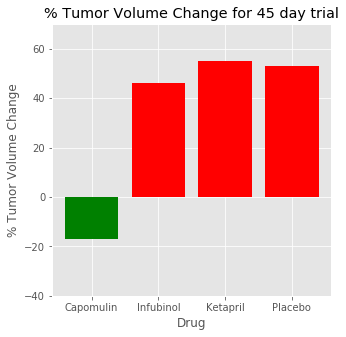

In [85]:
y=change_volume_df.iloc[0,:]
#Dataset
bars= change_volume_df.columns
height=change_volume_df.iloc[0,:]

y_pos = np.arange(len(bars))

plt.subplots(figsize=(5,5))
# Create bars and choose color
colors = ['red' if _y >=0 else 'green' for _y in y]
plt.bar(y_pos, height, color = colors)
 
# Add title and axis names
plt.title('% Tumor Volume Change for 45 day trial')
plt.xlabel('Drug')
plt.ylabel('% Tumor Volume Change')
 
# Limits for the Y axis
plt.ylim(-40,70)
 
# Create names
plt.xticks(y_pos, bars)
plt.savefig('Percent Volume Change.png') 
# Show graphic
plt.show()
